In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e14/sample_submission.csv
/kaggle/input/playground-series-s3e14/train.csv
/kaggle/input/playground-series-s3e14/test.csv


In [2]:
import seaborn as sns 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# !pip install catboost

In [4]:
# !pip install lightgbm

In [5]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor 
from lightgbm import LGBMRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso

In [6]:
df = pd.read_csv("/kaggle/input/playground-series-s3e14/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s3e14/test.csv")
id = test['id'] 
test = test.drop(['id'],axis=1) 
df = df.drop(['id'],axis=1)
test

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
1,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
3,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
4,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10189,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.474162,0.437923,34.525258
10190,25.0,0.50,0.25,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.482854,0.440676,35.648221
10191,25.0,0.50,0.38,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.568854,0.463065,37.724724
10192,12.5,0.25,0.25,0.38,0.50,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.407374,0.409261,31.881847


In [7]:
# !pip install pandas-profiling
# !pip install ydata-profiling
# from ydata_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file(output_file='Wild_Blueberry_Yield.html')

In [8]:
df[['clonesize','yield']].groupby('clonesize').mean()

,yield
clonesize,
10.0,5423.544958
12.5,6569.209692
20.0,5349.923696
25.0,5646.255505
37.5,4192.967774
40.0,4003.271060


In [9]:
df.corr()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
clonesize,1.000000,0.304130,0.080433,0.065131,-0.007607,0.016159,0.015838,0.016057,0.016343,0.016026,0.015987,0.165770,0.164823,-0.406793,-0.377688,-0.396898,-0.382619
honeybee,0.304130,1.000000,-0.017937,0.030671,-0.010394,0.005840,0.005755,0.005892,0.005942,0.005809,0.005485,0.046494,0.037532,-0.120492,-0.135310,-0.139261,-0.118001
bumbles,0.080433,-0.017937,1.000000,-0.164962,0.158001,-0.002104,-0.001813,-0.001769,-0.001613,-0.001804,-0.001644,-0.063294,-0.060232,0.160447,0.163987,0.177022,0.161145
andrena,0.065131,0.030671,-0.164962,1.000000,0.309556,-0.013061,-0.012928,-0.012993,-0.012924,-0.013035,-0.013071,-0.026572,-0.027193,0.073669,0.064722,0.063504,0.073969
osmia,-0.007607,-0.010394,0.158001,0.309556,1.000000,-0.031391,-0.030819,-0.031415,-0.031398,-0.031486,-0.031337,-0.079874,-0.078720,0.209495,0.192210,0.200597,0.198264
MaxOfUpperTRange,0.016159,0.005840,-0.002104,-0.013061,-0.031391,1.000000,0.998599,0.999806,0.999503,0.999829,0.999772,0.011322,0.010352,0.007580,0.146237,0.060963,-0.022517
MinOfUpperTRange,0.015838,0.005755,-0.001813,-0.012928,-0.030819,0.998599,1.000000,0.999004,0.998199,0.998953,0.999040,0.011727,0.010767,0.008409,0.147203,0.061812,-0.021929
AverageOfUpperTRange,0.016057,0.005892,-0.001769,-0.012993,-0.031415,0.999806,0.999004,1.000000,0.999465,0.999973,0.999974,0.011245,0.010260,0.008503,0.147676,0.062082,-0.021940
MaxOfLowerTRange,0.016343,0.005942,-0.001613,-0.012924,-0.031398,0.999503,0.998199,0.999465,1.000000,0.999489,0.999423,0.011302,0.010262,0.007902,0.146668,0.061378,-0.022197
MinOfLowerTRange,0.016026,0.005809,-0.001804,-0.013035,-0.031486,0.999829,0.998953,0.999973,0.999489,1.000000,0.999963,0.011466,0.010479,0.007909,0.146704,0.061360,-0.022319


In [10]:
df.corr()['yield']

clonesize              -0.382619
honeybee               -0.118001
bumbles                 0.161145
andrena                 0.073969
osmia                   0.198264
MaxOfUpperTRange       -0.022517
MinOfUpperTRange       -0.021929
AverageOfUpperTRange   -0.021940
MaxOfLowerTRange       -0.022197
MinOfLowerTRange       -0.022319
AverageOfLowerTRange   -0.022081
RainingDays            -0.477191
AverageRainingDays     -0.483870
fruitset                0.885967
fruitmass               0.826481
seeds                   0.868853
yield                   1.000000
Name: yield, dtype: float64

In [11]:
# df.drop(columns = ['MinOfUpperTRange','AverageOfUpperTRange','MaxOfLowerTRange','MinOfLowerTRange','AverageOfLowerTRange','RainingDays','fruitmass','seeds'],inplace=True)
# test.drop(columns = ['MinOfUpperTRange','AverageOfUpperTRange','MaxOfLowerTRange','MinOfLowerTRange','AverageOfLowerTRange','RainingDays','fruitmass','seeds'],inplace=True) 
# # 'MinOfUpperTRange', 'AverageOfUpperTRange', 'AverageOfLowerTRange', 'MaxOfUpperTRange', 'MaxOfLowerTRange'
df.drop(columns = ['MinOfUpperTRange', 'AverageOfUpperTRange', 'AverageOfLowerTRange', 'MaxOfUpperTRange', 'MaxOfLowerTRange','AverageRainingDays'],inplace=True)
test.drop(columns = ['MinOfUpperTRange', 'AverageOfUpperTRange', 'AverageOfLowerTRange', 'MaxOfUpperTRange', 'MaxOfLowerTRange','AverageRainingDays'],inplace=True)

<AxesSubplot: >

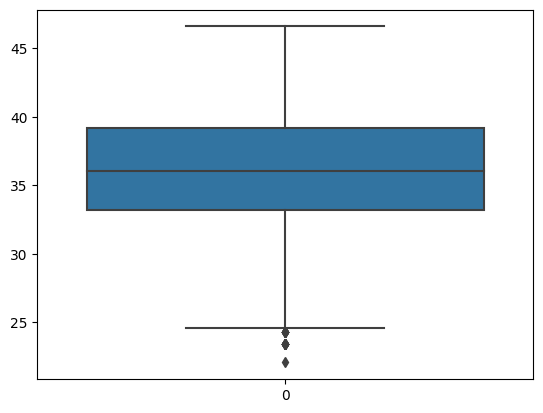

In [12]:
sns.boxplot(df['seeds'])

In [13]:
lower_limit = 0.06
upper_limit = 0.55
df['bumbles'] = df['bumbles'].apply(lambda x: lower_limit if x < lower_limit else upper_limit if x > upper_limit else x)
lower_limit = 0.0
upper_limit = 4.0
df['honeybee'] = df['honeybee'].apply(lambda x: lower_limit if x < lower_limit else upper_limit if x > upper_limit else x)
lower_limit = 0.1
df['andrena'] = df['andrena'].apply(lambda x: lower_limit if x < lower_limit else x)
# lower_limit = 0.2
# df['osmia'] = df['osmia'].apply(lambda x: lower_limit if x < lower_limit else x)
# lower_limit = 15
# df['RainingDays'] = df['RainingDays'].apply(lambda x: lower_limit if x < lower_limit else x)
# lower_limit = 0.08
# df['AverageRainingDays'] = df['AverageRainingDays'].apply(lambda x: lower_limit if x < lower_limit else x)
# lower_limit = 0.31
# df['fruitset'] = df['fruitset'].apply(lambda x: lower_limit if x < lower_limit else x)
# lower_limit = 0.34
# df['fruitmass'] = df['fruitmass'].apply(lambda x: lower_limit if x < lower_limit else x)
# lower_limit = 25
# df['seeds'] = df['seeds'].apply(lambda x: lower_limit if x < lower_limit else x)
df.corr()

,clonesize,honeybee,bumbles,andrena,osmia,MinOfLowerTRange,RainingDays,fruitset,fruitmass,seeds,yield
clonesize,1.000000,0.716426,0.080489,0.065350,-0.007607,0.016026,0.165770,-0.406793,-0.377688,-0.396898,-0.382619
honeybee,0.716426,1.000000,0.081718,0.148675,0.107056,0.012011,0.111050,-0.254683,-0.253994,-0.267445,-0.243630
bumbles,0.080489,0.081718,1.000000,-0.166788,0.157285,-0.001781,-0.063651,0.160612,0.163565,0.176652,0.161484
andrena,0.065350,0.148675,-0.166788,1.000000,0.308767,-0.012942,-0.026699,0.073457,0.064192,0.062956,0.073816
osmia,-0.007607,0.107056,0.157285,0.308767,1.000000,-0.031486,-0.079874,0.209495,0.192210,0.200597,0.198264
MinOfLowerTRange,0.016026,0.012011,-0.001781,-0.012942,-0.031486,1.000000,0.011466,0.007909,0.146704,0.061360,-0.022319
RainingDays,0.165770,0.111050,-0.063651,-0.026699,-0.079874,0.011466,1.000000,-0.468066,-0.447033,-0.478818,-0.477191
fruitset,-0.406793,-0.254683,0.160612,0.073457,0.209495,0.007909,-0.468066,1.000000,0.936988,0.929654,0.885967
fruitmass,-0.377688,-0.253994,0.163565,0.064192,0.192210,0.146704,-0.447033,0.936988,1.000000,0.931646,0.826481
seeds,-0.396898,-0.267445,0.176652,0.062956,0.200597,0.061360,-0.478818,0.929654,0.931646,1.000000,0.868853


<AxesSubplot: >

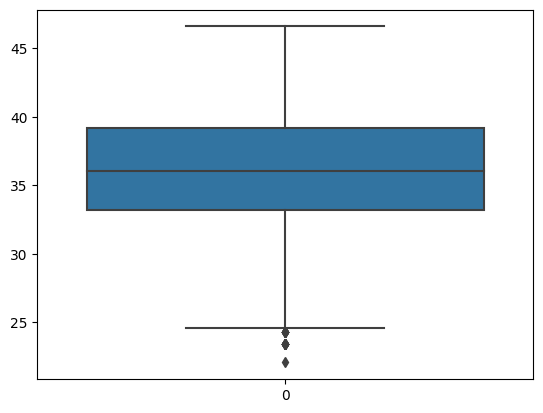

In [14]:
sns.boxplot(df['seeds'])

In [15]:
df.corr()

,clonesize,honeybee,bumbles,andrena,osmia,MinOfLowerTRange,RainingDays,fruitset,fruitmass,seeds,yield
clonesize,1.000000,0.716426,0.080489,0.065350,-0.007607,0.016026,0.165770,-0.406793,-0.377688,-0.396898,-0.382619
honeybee,0.716426,1.000000,0.081718,0.148675,0.107056,0.012011,0.111050,-0.254683,-0.253994,-0.267445,-0.243630
bumbles,0.080489,0.081718,1.000000,-0.166788,0.157285,-0.001781,-0.063651,0.160612,0.163565,0.176652,0.161484
andrena,0.065350,0.148675,-0.166788,1.000000,0.308767,-0.012942,-0.026699,0.073457,0.064192,0.062956,0.073816
osmia,-0.007607,0.107056,0.157285,0.308767,1.000000,-0.031486,-0.079874,0.209495,0.192210,0.200597,0.198264
MinOfLowerTRange,0.016026,0.012011,-0.001781,-0.012942,-0.031486,1.000000,0.011466,0.007909,0.146704,0.061360,-0.022319
RainingDays,0.165770,0.111050,-0.063651,-0.026699,-0.079874,0.011466,1.000000,-0.468066,-0.447033,-0.478818,-0.477191
fruitset,-0.406793,-0.254683,0.160612,0.073457,0.209495,0.007909,-0.468066,1.000000,0.936988,0.929654,0.885967
fruitmass,-0.377688,-0.253994,0.163565,0.064192,0.192210,0.146704,-0.447033,0.936988,1.000000,0.931646,0.826481
seeds,-0.396898,-0.267445,0.176652,0.062956,0.200597,0.061360,-0.478818,0.929654,0.931646,1.000000,0.868853


In [16]:
label = df['yield']
features = df.drop('yield',axis=1)
features

,clonesize,honeybee,bumbles,andrena,osmia,MinOfLowerTRange,RainingDays,fruitset,fruitmass,seeds
0,25.0,0.50,0.25,0.75,0.50,24.3,24.0,0.425011,0.417545,32.460887
1,25.0,0.50,0.25,0.50,0.50,24.3,24.0,0.444908,0.422051,33.858317
2,12.5,0.25,0.25,0.63,0.63,30.0,24.0,0.552927,0.470853,38.341781
3,12.5,0.25,0.25,0.63,0.50,27.0,24.0,0.565976,0.478137,39.467561
4,25.0,0.50,0.25,0.63,0.63,27.0,24.0,0.579677,0.494165,40.484512
...,...,...,...,...,...,...,...,...,...,...
15284,12.5,0.25,0.25,0.38,0.50,27.0,16.0,0.556302,0.476308,40.546480
15285,12.5,0.25,0.25,0.25,0.50,30.0,34.0,0.354413,0.388145,29.467434
15286,25.0,0.50,0.25,0.38,0.75,27.0,34.0,0.422548,0.416786,32.299059
15287,25.0,0.50,0.25,0.63,0.63,24.3,24.0,0.542170,0.434133,36.674243


In [17]:
from sklearn.model_selection import KFold
seed = 42
splits = 5     
k = KFold(n_splits = splits, random_state = seed, shuffle = True)

np.random.seed(seed)

In [18]:
X_train, X_test, y_train, y_test=train_test_split(features,label,test_size=0.2,random_state=seed)
X_train

,clonesize,honeybee,bumbles,andrena,osmia,MinOfLowerTRange,RainingDays,fruitset,fruitmass,seeds
245,25.0,0.50,0.38,0.50,0.63,24.3,24.0,0.384981,0.399724,29.742583
3017,12.5,0.25,0.25,0.38,0.25,33.0,34.0,0.335530,0.376874,27.735098
8047,12.5,0.25,0.38,0.50,0.50,27.0,24.0,0.582483,0.488569,40.655498
14223,12.5,0.25,0.38,0.50,0.75,33.0,1.0,0.573428,0.466671,37.966864
13397,25.0,0.50,0.25,0.63,0.75,33.0,16.0,0.502398,0.453650,36.600113
...,...,...,...,...,...,...,...,...,...,...
5191,12.5,0.25,0.25,0.75,0.50,33.0,24.0,0.603525,0.497917,42.171765
13418,12.5,0.25,0.38,0.38,0.63,27.0,34.0,0.615612,0.510575,42.731736
5390,25.0,0.50,0.25,0.63,0.50,30.0,16.0,0.469632,0.434133,34.275163
860,12.5,0.25,0.25,0.25,0.75,33.0,1.0,0.592489,0.491269,40.764696


In [19]:
# Create the individual models
catboost_model = CatBoostRegressor(random_state = seed, objective = 'MAE', verbose = 0)
lgbm_model = LGBMRegressor(random_state = seed, objective = 'mae')

# # Create the L1 regularized linear model
# lasso_model = Lasso(alpha=0.1)

# Create the VotingRegressor with L1 regularization
estimators = [('catboost', catboost_model), ('lgbm', lgbm_model)]
voting_regressor = VotingRegressor(estimators)

# Train the VotingRegressor
voting_regressor.fit(X_train, y_train)

# Evaluate the model
mse = mean_squared_error(y_test, voting_regressor.predict(X_test)) 
print("Mean squared error: ", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse) 

Mean squared error:  308069.7712158829
Root Mean Squared Error: 555.0403329631847


In [20]:
pred = voting_regressor.predict(test) 
pred 

array([4290.29690864, 5918.10991869, 7215.7734853 , ..., 6527.57722073,
       4436.54443228, 7271.59404515])

In [21]:
submission=pd.DataFrame() 
submission['id']=id
submission['yield']=pred
submission.to_csv('submission.csv', index=False)